In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


Using TensorFlow backend.
/home/met/ug/14145059/anaconda3/envs/deeplearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train=pd.read_csv("Data/myntra_train_dataset.csv")
test=pd.read_csv("Data/myntra_test.csv")
sub=pd.read_csv("Data/Submission_online.csv")

In [3]:
train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
1,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
2,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Biker
3,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
4,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic


In [4]:
test.head()

,Brand,Category,Gender,Color,Link_to_the_image
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...


In [5]:
sub.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [4]:
train.fillna(method='bfill',inplace=True)
test.fillna(method='bfill',inplace=True)

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_dir=os.path.abspath("Train_Data/Train/")

In [7]:
test_dir=os.path.abspath("Test_Data/Test/")

In [8]:
os.path.exists(train_dir)

True

In [9]:
os.path.exists(test_dir)

True

In [10]:
train_dir

'/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Train_Data/Train'

In [11]:
train_img_path="Train_Data/Train/"

In [12]:
img_2=cv2.imread(train_img_path+"0_Graphic.jpg")

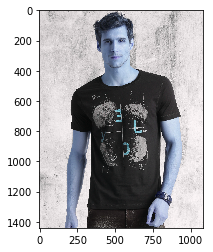

In [13]:
plt.imshow(img_2)

In [14]:
train_img_names=os.listdir(train_dir)

In [15]:
train_img_names.sort()

In [16]:
from tqdm import tqdm

In [17]:
im_name=[]
for i in tqdm(range(70000)):
    im_name.append(str(i)+"_"+train['Sub_category'][i]+'.jpg')
    

100%|██████████| 70000/70000 [00:02<00:00, 33365.98it/s]


In [18]:
train['Image_Name']=im_name

In [19]:
train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category,Image_Name
0,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic,0_Graphic.jpg
1,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic,1_Graphic.jpg
2,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Biker,2_Biker.jpg
3,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic,3_Graphic.jpg
4,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic,4_Graphic.jpg


In [20]:
del_rows=list(set(im_name).difference(set(train_img_names)))

In [26]:
del_rows.append('3953_Graphic.jpg')

In [ ]:
del_rows.append('4018_Typography.jpg')

In [21]:
len(del_rows)

24

In [22]:
train.index=train["Image_Name"]

In [23]:
train.drop(del_rows,inplace=True)

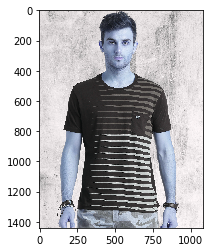

In [24]:
plt.imshow(cv2.imread(train_img_path+train.index[40]))

In [25]:
import skimage
import scipy

In [28]:
## Image Resizer
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32,32))
    #img = img.astype('float32')
    return (img)

In [29]:
## Image Resizer
def read_img_scipy(img_path):
    img = scipy.misc.imread(img_path)
    img = scipy.misc.imresize(img, (32,32))
    #img = img.astype('float32')
    return (img)

### Train Data Preprocessing

In [32]:
from tqdm import tqdm

train_img = []
for i in tqdm(range(10000,30001)):
    train_img.append(read_img_scipy(train_img_path + train.index[i]))

100%|██████████| 20001/20001 [32:13<00:00, 10.34it/s]


In [ ]:
Infected Images: 

In [33]:
X_train = np.array(train_img, np.float32) / 255

In [34]:
mean_img = np.mean(X_train,axis=0)
std_img = np.std(X_train,axis=0)

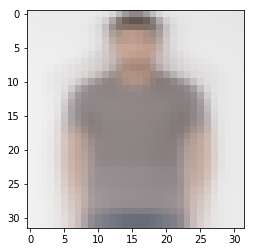

In [35]:
plt.imshow(mean_img)

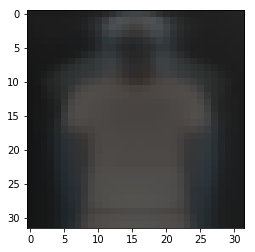

In [36]:
plt.imshow(std_img)

In [37]:
X_train_norm = (X_train - mean_img) / std_img

In [38]:
X_train_norm.shape

(20001, 32, 32, 3)

In [39]:
label=train["Sub_category"].tolist()

In [40]:
label=label[10000:30001]

In [41]:
Y_train = {k:v+1 for v,k in enumerate(set(label))}

In [42]:
y_train = [Y_train[k] for k in label]

### Test Data Preprocessing

In [51]:
test=pd.read_csv("Data/myntra_test.csv")

In [52]:
test.head()

,Brand,Category,Gender,Color,Link_to_the_image
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...


In [53]:
test_img_names=os.listdir(test_dir)

In [54]:
len(test_img_names)

14952

In [55]:
im_name=[]
for i in tqdm(range(15000)):
    im_name.append(str(i)+'.jpg')

100%|██████████| 15000/15000 [00:00<00:00, 546612.57it/s]


In [56]:
test.index=im_name

In [57]:
test.head(2)

,Brand,Category,Gender,Color,Link_to_the_image
0.jpg,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1.jpg,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...


In [50]:
len(test_img_names)

14952

In [58]:
((test.index)).difference(test_img_names)

Index(['10194.jpg', '10229.jpg', '10513.jpg', '10594.jpg', '10755.jpg',
       '10955.jpg', '11104.jpg', '11140.jpg', '114.jpg', '1141.jpg',
       '11450.jpg', '12767.jpg', '14211.jpg', '144.jpg', '14760.jpg',
       '14813.jpg', '1496.jpg', '1512.jpg', '1720.jpg', '2120.jpg', '2326.jpg',
       '2604.jpg', '3371.jpg', '3715.jpg', '3926.jpg', '4318.jpg', '4581.jpg',
       '4720.jpg', '4841.jpg', '4845.jpg', '4847.jpg', '5071.jpg', '556.jpg',
       '5626.jpg', '6217.jpg', '6522.jpg', '72.jpg', '7327.jpg', '7499.jpg',
       '7573.jpg', '7763.jpg', '8260.jpg', '8349.jpg', '8540.jpg', '8776.jpg',
       '9216.jpg', '9224.jpg', '9714.jpg'],
      dtype='object')

In [59]:
rows_need_to_del=list(((test.index)).difference(test_img_names))

In [60]:
len(rows_need_to_del)

48

In [61]:
test.drop(rows_need_to_del,inplace=True)

Infected Pictures: 144, 1512, 4318,5071,6217,7573,8776,10513,11104

In [218]:
test.index[5051]

'5070.jpg'

In [62]:
test_img_path='Test_Data/Test/'

In [63]:
test_img=[]
for img in tqdm(test.index):
    test_img.append(read_img(test_img_path+img))

100%|██████████| 14952/14952 [14:13<00:00, 17.52it/s]


In [64]:
X_test = np.array(test_img, np.float32) / 255.

In [65]:
X_test.shape

(14952, 32, 32, 3)

In [66]:
X_test=(X_test-mean_img)/std_img

## Modeling

In [164]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D, Input, GlobalAveragePooling2D, SeparableConv2D, BatchNormalization, PReLU, Activation

from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [105]:
from keras.applications import VGG16

ip =Input((32,32,3))
vgg16 = VGG16(include_top=False, pooling='avg', input_tensor=ip)

for layer in vgg_cropped.layers[-3:]: layer.trainable=True

vgg_cropped = Model(vgg16.input, layer)

x = vgg_cropped(ip)
x = GlobalAveragePooling2D()(x)
x = Dense(24, activation='softmax')(x)
model2 = Model(ip, x)
model2.compile(optimizer=Nadam(), metrics=['accuracy'], loss='categorical_crossentropy')

vgg_cropped.summary()

In [139]:
layer = vgg16.get_layer(name='block4_conv3').output

In [144]:
model2.compile(optimizer=Adam(), metrics=['accuracy'], loss='categorical_crossentropy')

In [145]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
model_6 (Model)              (None, 4, 4, 512)         7635264   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                12312     
Total params: 7,647,576
Trainable params: 5,912,088
Non-trainable params: 1,735,488
_________________________________________________________________


In [68]:
y_train = to_categorical(y_train)

In [172]:
model = Sequential()
model.add(SeparableConv2D(64, (3,3), padding='same',input_shape = (32,32,3))) # if you resize the image above, change the shape
model.add(BatchNormalization())
model.add(PReLU())
model.add(SeparableConv2D(64, (3,3), strides=2 ))
model.add(BatchNormalization())
model.add(PReLU())
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(SeparableConv2D(128, (3,3), strides=2 ))
model.add(BatchNormalization())
model.add(PReLU())
# model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(SeparableConv2D(512, (3,3) , padding='same'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(SeparableConv2D(512, (3,3), strides=2 ))
model.add(BatchNormalization())
model.add(PReLU())
# model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256 ))
model.add(Dropout(0.1))
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dense(256 ))
#model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [173]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [174]:
model.fit(X_train_norm, y_train, batch_size=100, epochs=5, validation_split=0.3, callbacks=[early_stops])

Train on 14000 samples, validate on 6001 samples
Epoch 1/5
14000/14000 [==============================] - 72s 5ms/step - loss: 1.9459 - acc: 0.4316 - val_loss: 3.0580 - val_acc: 0.2783
Epoch 2/5
14000/14000 [==============================] - 75s 5ms/step - loss: 1.5972 - acc: 0.5263 - val_loss: 2.7963 - val_acc: 0.2783
Epoch 3/5
14000/14000 [==============================] - 74s 5ms/step - loss: 1.3786 - acc: 0.5844 - val_loss: 2.5485 - val_acc: 0.2933
Epoch 4/5
 3400/14000 [======>.......................] - ETA: 53s - loss: 1.1144 - acc: 0.6585

KeyboardInterrupt: 

In [159]:
model.save_weights('sep_bn_nodrop_1.h5')

In [146]:
model2.fit(X_train_norm, y_train, batch_size=100, epochs=10, validation_split=0.3, callbacks=[early_stops])

Train on 14000 samples, validate on 6001 samples
Epoch 1/10
14000/14000 [==============================] - 167s 12ms/step - loss: 10.9879 - acc: 0.3139 - val_loss: 11.6326 - val_acc: 0.2783
Epoch 2/10
 2100/14000 [===>..........................] - ETA: 2:10 - loss: 11.1906 - acc: 0.3057

KeyboardInterrupt: 

In [72]:
predictions = model.predict(X_test)

In [73]:
predictions = np.argmax(predictions, axis= 1)

In [254]:
predictions

array([18, 18, 18, ...,  6,  6,  1])

In [74]:
predictions

array([ 2,  2,  2, ...,  9,  6, 20])

In [75]:
y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]

In [257]:
len(pred_labels)

14952

## Submission

In [84]:
sub=pd.read_csv("Data/Submission_online.csv")

In [85]:
sub.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [86]:
len(sub)

15000

In [89]:
\

In [90]:
test.head(2)

,index,Brand,Category,Gender,Color,Link_to_the_image
0,0.jpg,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1,1.jpg,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...


In [271]:
sub.head(2)

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0.jpg,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1.jpg,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN


In [91]:
test["Sub_category"]=pred_labels

In [92]:
sub.index=im_name

In [93]:
sub.reset_index(inplace=True)
test.reset_index(inplace=True)

In [94]:
sub_2=sub.merge(test,on="index",how='outer',)

In [95]:
sub_2.columns

Index(['index', 'Brand_x', 'Category_x', 'Gender_x', 'Color_x',
       'Link_to_the_image_x', 'Sub_category_x', 'level_0', 'Brand_y',
       'Category_y', 'Gender_y', 'Color_y', 'Link_to_the_image_y',
       'Sub_category_y'],
      dtype='object')

In [312]:
sub.columns

Index(['level_0', 'index', 'Brand', 'Category', 'Gender', 'Color',
       'Link_to_the_image', 'Sub_category'],
      dtype='object')

In [96]:
sub_2=sub_2[['Brand_x', 'Category_x', 'Gender_x', 'Color_x', 'Link_to_the_image_x',
       'Sub_category_y']]

In [97]:
sub_2.head()

,Brand_x,Category_x,Gender_x,Color_x,Link_to_the_image_x,Sub_category_y
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,Solid
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,Solid
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,Solid
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,Floral
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,Typography


In [98]:
sub_2['Sub_category_y'].isnull().sum()

48

In [302]:
train.columns

Index(['Brand', 'Category', 'Gender', 'Color', 'Link_to_the_image',
       'Sub_category', 'Image_Name'],
      dtype='object')

In [303]:
sub_2.columns

Index(['Brand_x', 'Category_x', 'Gender_x', 'Color_x', 'Link_to_the_image_x',
       'Sub_category_y'],
      dtype='object')

In [99]:
sub_2.rename(columns={'Brand_x':'Brand',
                      'Category_x':'Category',
                      'Gender_x':'Gender',
                      "Color_x":"Color",
                      "Link_to_the_image_x":"Link_to_the_image",
                      'Sub_category_y':"Sub_category"
                      
    
},inplace=True)

In [101]:
sub_2['Sub_category'].fillna("Solid",inplace=True)

In [102]:
sub_2.to_csv("20k_train_submission.csv",index=False)

In [76]:
sub=pd.read_csv("First_submission.csv")

In [77]:
sub.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,Solid
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,Solid
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,Solid
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,Typography
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,Typography


In [78]:
sub['Sub_category']=pred_labels

ValueError: Length of values does not match length of index

## Weights Saving

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [104]:
model.save("Base_Model_Weights_1.h5")